# Preparation

In [1]:
#@title Imports

from typing import List, Tuple

import matplotlib.pyplot as plt
from PIL import Image
import requests
import torch
from torchvision import models
import torchvision.transforms as tf
import tqdm

In [2]:
#@title ImageNet-1K Labels

labels = [
    "tench",
    "goldfish",
    "great white shark",
    "tiger shark",
    "hammerhead",
    "electric ray",
    "stingray",
    "cock",
    "hen",
    "ostrich",
    "brambling",
    "goldfinch",
    "house finch",
    "junco",
    "indigo bunting",
    "robin",
    "bulbul",
    "jay",
    "magpie",
    "chickadee",
    "water ouzel",
    "kite",
    "bald eagle",
    "vulture",
    "great grey owl",
    "European fire salamander",
    "common newt",
    "eft",
    "spotted salamander",
    "axolotl",
    "bullfrog",
    "tree frog",
    "tailed frog",
    "loggerhead",
    "leatherback turtle",
    "mud turtle",
    "terrapin",
    "box turtle",
    "banded gecko",
    "common iguana",
    "American chameleon",
    "whiptail",
    "agama",
    "frilled lizard",
    "alligator lizard",
    "Gila monster",
    "green lizard",
    "African chameleon",
    "Komodo dragon",
    "African crocodile",
    "American alligator",
    "triceratops",
    "thunder snake",
    "ringneck snake",
    "hognose snake",
    "green snake",
    "king snake",
    "garter snake",
    "water snake",
    "vine snake",
    "night snake",
    "boa constrictor",
    "rock python",
    "Indian cobra",
    "green mamba",
    "sea snake",
    "horned viper",
    "diamondback",
    "sidewinder",
    "trilobite",
    "harvestman",
    "scorpion",
    "black and gold garden spider",
    "barn spider",
    "garden spider",
    "black widow",
    "tarantula",
    "wolf spider",
    "tick",
    "centipede",
    "black grouse",
    "ptarmigan",
    "ruffed grouse",
    "prairie chicken",
    "peacock",
    "quail",
    "partridge",
    "African grey",
    "macaw",
    "sulphur-crested cockatoo",
    "lorikeet",
    "coucal",
    "bee eater",
    "hornbill",
    "hummingbird",
    "jacamar",
    "toucan",
    "drake",
    "red-breasted merganser",
    "goose",
    "black swan",
    "tusker",
    "echidna",
    "platypus",
    "wallaby",
    "koala",
    "wombat",
    "jellyfish",
    "sea anemone",
    "brain coral",
    "flatworm",
    "nematode",
    "conch",
    "snail",
    "slug",
    "sea slug",
    "chiton",
    "chambered nautilus",
    "Dungeness crab",
    "rock crab",
    "fiddler crab",
    "king crab",
    "American lobster",
    "spiny lobster",
    "crayfish",
    "hermit crab",
    "isopod",
    "white stork",
    "black stork",
    "spoonbill",
    "flamingo",
    "little blue heron",
    "American egret",
    "bittern",
    "crane",
    "limpkin",
    "European gallinule",
    "American coot",
    "bustard",
    "ruddy turnstone",
    "red-backed sandpiper",
    "redshank",
    "dowitcher",
    "oystercatcher",
    "pelican",
    "king penguin",
    "albatross",
    "grey whale",
    "killer whale",
    "dugong",
    "sea lion",
    "Chihuahua",
    "Japanese spaniel",
    "Maltese dog",
    "Pekinese",
    "Shih-Tzu",
    "Blenheim spaniel",
    "papillon",
    "toy terrier",
    "Rhodesian ridgeback",
    "Afghan hound",
    "basset",
    "beagle",
    "bloodhound",
    "bluetick",
    "black-and-tan coonhound",
    "Walker hound",
    "English foxhound",
    "redbone",
    "borzoi",
    "Irish wolfhound",
    "Italian greyhound",
    "whippet",
    "Ibizan hound",
    "Norwegian elkhound",
    "otterhound",
    "Saluki",
    "Scottish deerhound",
    "Weimaraner",
    "Staffordshire bullterrier",
    "American Staffordshire terrier",
    "Bedlington terrier",
    "Border terrier",
    "Kerry blue terrier",
    "Irish terrier",
    "Norfolk terrier",
    "Norwich terrier",
    "Yorkshire terrier",
    "wire-haired fox terrier",
    "Lakeland terrier",
    "Sealyham terrier",
    "Airedale",
    "cairn",
    "Australian terrier",
    "Dandie Dinmont",
    "Boston bull",
    "miniature schnauzer",
    "giant schnauzer",
    "standard schnauzer",
    "Scotch terrier",
    "Tibetan terrier",
    "silky terrier",
    "soft-coated wheaten terrier",
    "West Highland white terrier",
    "Lhasa",
    "flat-coated retriever",
    "curly-coated retriever",
    "golden retriever",
    "Labrador retriever",
    "Chesapeake Bay retriever",
    "German short-haired pointer",
    "vizsla",
    "English setter",
    "Irish setter",
    "Gordon setter",
    "Brittany spaniel",
    "clumber",
    "English springer",
    "Welsh springer spaniel",
    "cocker spaniel",
    "Sussex spaniel",
    "Irish water spaniel",
    "kuvasz",
    "schipperke",
    "groenendael",
    "malinois",
    "briard",
    "kelpie",
    "komondor",
    "Old English sheepdog",
    "Shetland sheepdog",
    "collie",
    "Border collie",
    "Bouvier des Flandres",
    "Rottweiler",
    "German shepherd",
    "Doberman",
    "miniature pinscher",
    "Greater Swiss Mountain dog",
    "Bernese mountain dog",
    "Appenzeller",
    "EntleBucher",
    "boxer",
    "bull mastiff",
    "Tibetan mastiff",
    "French bulldog",
    "Great Dane",
    "Saint Bernard",
    "Eskimo dog",
    "malamute",
    "Siberian husky",
    "dalmatian",
    "affenpinscher",
    "basenji",
    "pug",
    "Leonberg",
    "Newfoundland",
    "Great Pyrenees",
    "Samoyed",
    "Pomeranian",
    "chow",
    "keeshond",
    "Brabancon griffon",
    "Pembroke",
    "Cardigan",
    "toy poodle",
    "miniature poodle",
    "standard poodle",
    "Mexican hairless",
    "timber wolf",
    "white wolf",
    "red wolf",
    "coyote",
    "dingo",
    "dhole",
    "African hunting dog",
    "hyena",
    "red fox",
    "kit fox",
    "Arctic fox",
    "grey fox",
    "tabby",
    "tiger cat",
    "Persian cat",
    "Siamese cat",
    "Egyptian cat",
    "cougar",
    "lynx",
    "leopard",
    "snow leopard",
    "jaguar",
    "lion",
    "tiger",
    "cheetah",
    "brown bear",
    "American black bear",
    "ice bear",
    "sloth bear",
    "mongoose",
    "meerkat",
    "tiger beetle",
    "ladybug",
    "ground beetle",
    "long-horned beetle",
    "leaf beetle",
    "dung beetle",
    "rhinoceros beetle",
    "weevil",
    "fly",
    "bee",
    "ant",
    "grasshopper",
    "cricket",
    "walking stick",
    "cockroach",
    "mantis",
    "cicada",
    "leafhopper",
    "lacewing",
    "dragonfly",
    "damselfly",
    "admiral",
    "ringlet",
    "monarch",
    "cabbage butterfly",
    "sulphur butterfly",
    "lycaenid",
    "starfish",
    "sea urchin",
    "sea cucumber",
    "wood rabbit",
    "hare",
    "Angora",
    "hamster",
    "porcupine",
    "fox squirrel",
    "marmot",
    "beaver",
    "guinea pig",
    "sorrel",
    "zebra",
    "hog",
    "wild boar",
    "warthog",
    "hippopotamus",
    "ox",
    "water buffalo",
    "bison",
    "ram",
    "bighorn",
    "ibex",
    "hartebeest",
    "impala",
    "gazelle",
    "Arabian camel",
    "llama",
    "weasel",
    "mink",
    "polecat",
    "black-footed ferret",
    "otter",
    "skunk",
    "badger",
    "armadillo",
    "three-toed sloth",
    "orangutan",
    "gorilla",
    "chimpanzee",
    "gibbon",
    "siamang",
    "guenon",
    "patas",
    "baboon",
    "macaque",
    "langur",
    "colobus",
    "proboscis monkey",
    "marmoset",
    "capuchin",
    "howler monkey",
    "titi",
    "spider monkey",
    "squirrel monkey",
    "Madagascar cat",
    "indri",
    "Indian elephant",
    "African elephant",
    "lesser panda",
    "giant panda",
    "barracouta",
    "eel",
    "coho",
    "rock beauty",
    "anemone fish",
    "sturgeon",
    "gar",
    "lionfish",
    "puffer",
    "abacus",
    "abaya",
    "academic gown",
    "accordion",
    "acoustic guitar",
    "aircraft carrier",
    "airliner",
    "airship",
    "altar",
    "ambulance",
    "amphibian",
    "analog clock",
    "apiary",
    "apron",
    "ashcan",
    "assault rifle",
    "backpack",
    "bakery",
    "balance beam",
    "balloon",
    "ballpoint",
    "Band Aid",
    "banjo",
    "bannister",
    "barbell",
    "barber chair",
    "barbershop",
    "barn",
    "barometer",
    "barrel",
    "barrow",
    "baseball",
    "basketball",
    "bassinet",
    "bassoon",
    "bathing cap",
    "bath towel",
    "bathtub",
    "beach wagon",
    "beacon",
    "beaker",
    "bearskin",
    "beer bottle",
    "beer glass",
    "bell cote",
    "bib",
    "bicycle-built-for-two",
    "bikini",
    "binder",
    "binoculars",
    "birdhouse",
    "boathouse",
    "bobsled",
    "bolo tie",
    "bonnet",
    "bookcase",
    "bookshop",
    "bottlecap",
    "bow",
    "bow tie",
    "brass",
    "brassiere",
    "breakwater",
    "breastplate",
    "broom",
    "bucket",
    "buckle",
    "bulletproof vest",
    "bullet train",
    "butcher shop",
    "cab",
    "caldron",
    "candle",
    "cannon",
    "canoe",
    "can opener",
    "cardigan",
    "car mirror",
    "carousel",
    "carpenter's kit",
    "carton",
    "car wheel",
    "cash machine",
    "cassette",
    "cassette player",
    "castle",
    "catamaran",
    "CD player",
    "cello",
    "cellular telephone",
    "chain",
    "chainlink fence",
    "chain mail",
    "chain saw",
    "chest",
    "chiffonier",
    "chime",
    "china cabinet",
    "Christmas stocking",
    "church",
    "cinema",
    "cleaver",
    "cliff dwelling",
    "cloak",
    "clog",
    "cocktail shaker",
    "coffee mug",
    "coffeepot",
    "coil",
    "combination lock",
    "computer keyboard",
    "confectionery",
    "container ship",
    "convertible",
    "corkscrew",
    "cornet",
    "cowboy boot",
    "cowboy hat",
    "cradle",
    "crane",
    "crash helmet",
    "crate",
    "crib",
    "Crock Pot",
    "croquet ball",
    "crutch",
    "cuirass",
    "dam",
    "desk",
    "desktop computer",
    "dial telephone",
    "diaper",
    "digital clock",
    "digital watch",
    "dining table",
    "dishrag",
    "dishwasher",
    "disk brake",
    "dock",
    "dogsled",
    "dome",
    "doormat",
    "drilling platform",
    "drum",
    "drumstick",
    "dumbbell",
    "Dutch oven",
    "electric fan",
    "electric guitar",
    "electric locomotive",
    "entertainment center",
    "envelope",
    "espresso maker",
    "face powder",
    "feather boa",
    "file",
    "fireboat",
    "fire engine",
    "fire screen",
    "flagpole",
    "flute",
    "folding chair",
    "football helmet",
    "forklift",
    "fountain",
    "fountain pen",
    "four-poster",
    "freight car",
    "French horn",
    "frying pan",
    "fur coat",
    "garbage truck",
    "gasmask",
    "gas pump",
    "goblet",
    "go-kart",
    "golf ball",
    "golfcart",
    "gondola",
    "gong",
    "gown",
    "grand piano",
    "greenhouse",
    "grille",
    "grocery store",
    "guillotine",
    "hair slide",
    "hair spray",
    "half track",
    "hammer",
    "hamper",
    "hand blower",
    "hand-held computer",
    "handkerchief",
    "hard disc",
    "harmonica",
    "harp",
    "harvester",
    "hatchet",
    "holster",
    "home theater",
    "honeycomb",
    "hook",
    "hoopskirt",
    "horizontal bar",
    "horse cart",
    "hourglass",
    "iPod",
    "iron",
    "jack-o'-lantern",
    "jean",
    "jeep",
    "jersey",
    "jigsaw puzzle",
    "jinrikisha",
    "joystick",
    "kimono",
    "knee pad",
    "knot",
    "lab coat",
    "ladle",
    "lampshade",
    "laptop",
    "lawn mower",
    "lens cap",
    "letter opener",
    "library",
    "lifeboat",
    "lighter",
    "limousine",
    "liner",
    "lipstick",
    "Loafer",
    "lotion",
    "loudspeaker",
    "loupe",
    "lumbermill",
    "magnetic compass",
    "mailbag",
    "mailbox",
    "maillot",
    "maillot",
    "manhole cover",
    "maraca",
    "marimba",
    "mask",
    "matchstick",
    "maypole",
    "maze",
    "measuring cup",
    "medicine chest",
    "megalith",
    "microphone",
    "microwave",
    "military uniform",
    "milk can",
    "minibus",
    "miniskirt",
    "minivan",
    "missile",
    "mitten",
    "mixing bowl",
    "mobile home",
    "Model T",
    "modem",
    "monastery",
    "monitor",
    "moped",
    "mortar",
    "mortarboard",
    "mosque",
    "mosquito net",
    "motor scooter",
    "mountain bike",
    "mountain tent",
    "mouse",
    "mousetrap",
    "moving van",
    "muzzle",
    "nail",
    "neck brace",
    "necklace",
    "nipple",
    "notebook",
    "obelisk",
    "oboe",
    "ocarina",
    "odometer",
    "oil filter",
    "organ",
    "oscilloscope",
    "overskirt",
    "oxcart",
    "oxygen mask",
    "packet",
    "paddle",
    "paddlewheel",
    "padlock",
    "paintbrush",
    "pajama",
    "palace",
    "panpipe",
    "paper towel",
    "parachute",
    "parallel bars",
    "park bench",
    "parking meter",
    "passenger car",
    "patio",
    "pay-phone",
    "pedestal",
    "pencil box",
    "pencil sharpener",
    "perfume",
    "Petri dish",
    "photocopier",
    "pick",
    "pickelhaube",
    "picket fence",
    "pickup",
    "pier",
    "piggy bank",
    "pill bottle",
    "pillow",
    "ping-pong ball",
    "pinwheel",
    "pirate",
    "pitcher",
    "plane",
    "planetarium",
    "plastic bag",
    "plate rack",
    "plow",
    "plunger",
    "Polaroid camera",
    "pole",
    "police van",
    "poncho",
    "pool table",
    "pop bottle",
    "pot",
    "potter's wheel",
    "power drill",
    "prayer rug",
    "printer",
    "prison",
    "projectile",
    "projector",
    "puck",
    "punching bag",
    "purse",
    "quill",
    "quilt",
    "racer",
    "racket",
    "radiator",
    "radio",
    "radio telescope",
    "rain barrel",
    "recreational vehicle",
    "reel",
    "reflex camera",
    "refrigerator",
    "remote control",
    "restaurant",
    "revolver",
    "rifle",
    "rocking chair",
    "rotisserie",
    "rubber eraser",
    "rugby ball",
    "rule",
    "running shoe",
    "safe",
    "safety pin",
    "saltshaker",
    "sandal",
    "sarong",
    "sax",
    "scabbard",
    "scale",
    "school bus",
    "schooner",
    "scoreboard",
    "screen",
    "screw",
    "screwdriver",
    "seat belt",
    "sewing machine",
    "shield",
    "shoe shop",
    "shoji",
    "shopping basket",
    "shopping cart",
    "shovel",
    "shower cap",
    "shower curtain",
    "ski",
    "ski mask",
    "sleeping bag",
    "slide rule",
    "sliding door",
    "slot",
    "snorkel",
    "snowmobile",
    "snowplow",
    "soap dispenser",
    "soccer ball",
    "sock",
    "solar dish",
    "sombrero",
    "soup bowl",
    "space bar",
    "space heater",
    "space shuttle",
    "spatula",
    "speedboat",
    "spider web",
    "spindle",
    "sports car",
    "spotlight",
    "stage",
    "steam locomotive",
    "steel arch bridge",
    "steel drum",
    "stethoscope",
    "stole",
    "stone wall",
    "stopwatch",
    "stove",
    "strainer",
    "streetcar",
    "stretcher",
    "studio couch",
    "stupa",
    "submarine",
    "suit",
    "sundial",
    "sunglass",
    "sunglasses",
    "sunscreen",
    "suspension bridge",
    "swab",
    "sweatshirt",
    "swimming trunks",
    "swing",
    "switch",
    "syringe",
    "table lamp",
    "tank",
    "tape player",
    "teapot",
    "teddy",
    "television",
    "tennis ball",
    "thatch",
    "theater curtain",
    "thimble",
    "thresher",
    "throne",
    "tile roof",
    "toaster",
    "tobacco shop",
    "toilet seat",
    "torch",
    "totem pole",
    "tow truck",
    "toyshop",
    "tractor",
    "trailer truck",
    "tray",
    "trench coat",
    "tricycle",
    "trimaran",
    "tripod",
    "triumphal arch",
    "trolleybus",
    "trombone",
    "tub",
    "turnstile",
    "typewriter keyboard",
    "umbrella",
    "unicycle",
    "upright",
    "vacuum",
    "vase",
    "vault",
    "velvet",
    "vending machine",
    "vestment",
    "viaduct",
    "violin",
    "volleyball",
    "waffle iron",
    "wall clock",
    "wallet",
    "wardrobe",
    "warplane",
    "washbasin",
    "washer",
    "water bottle",
    "water jug",
    "water tower",
    "whiskey jug",
    "whistle",
    "wig",
    "window screen",
    "window shade",
    "Windsor tie",
    "wine bottle",
    "wing",
    "wok",
    "wooden spoon",
    "wool",
    "worm fence",
    "wreck",
    "yawl",
    "yurt",
    "web site",
    "comic book",
    "crossword puzzle",
    "street sign",
    "traffic light",
    "book jacket",
    "menu",
    "plate",
    "guacamole",
    "consomme",
    "hot pot",
    "trifle",
    "ice cream",
    "ice lolly",
    "French loaf",
    "bagel",
    "pretzel",
    "cheeseburger",
    "hotdog",
    "mashed potato",
    "head cabbage",
    "broccoli",
    "cauliflower",
    "zucchini",
    "spaghetti squash",
    "acorn squash",
    "butternut squash",
    "cucumber",
    "artichoke",
    "bell pepper",
    "cardoon",
    "mushroom",
    "Granny Smith",
    "strawberry",
    "orange",
    "lemon",
    "fig",
    "pineapple",
    "banana",
    "jackfruit",
    "custard apple",
    "pomegranate",
    "hay",
    "carbonara",
    "chocolate sauce",
    "dough",
    "meat loaf",
    "pizza",
    "potpie",
    "burrito",
    "red wine",
    "espresso",
    "cup",
    "eggnog",
    "alp",
    "bubble",
    "cliff",
    "coral reef",
    "geyser",
    "lakeside",
    "promontory",
    "sandbar",
    "seashore",
    "valley",
    "volcano",
    "ballplayer",
    "groom",
    "scuba diver",
    "rapeseed",
    "daisy",
    "yellow lady's slipper",
    "corn",
    "acorn",
    "hip",
    "buckeye",
    "coral fungus",
    "agaric",
    "gyromitra",
    "stinkhorn",
    "earthstar",
    "hen-of-the-woods",
    "bolete",
    "ear",
    "toilet tissue",
]

In [3]:
#@title Utils

transform = tf.Compose([
    tf.Resize(256),
    tf.CenterCrop(224),
    tf.ToTensor(),
])

normalize = tf.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225],
)


def load_images_from_urls(
        urls: List[str],
        transform: torch.nn.Module = tf.ToTensor(),
) -> torch.Tensor:
    images = []

    for url in urls:
        image = Image.open(
            requests.get(url=url, stream=True).raw
        )

        images.append(transform(image).unsqueeze(dim=0))

    return torch.cat(images, dim=0)


def predict(
        model,
        data: torch.Tensor,
        labels: List[str],
) -> Tuple[torch.Tensor, List[float], List[str]]:
    softmax = torch.nn.Softmax(dim=-1)

    out = softmax(model(data)).detach().cpu()

    preds = torch.argmax(out, dim=-1)

    confs = []
    for i in range(len(data)):
        confs.append(float(out[i][preds[i]]))

    pred_labels = [labels[i] for i in preds]

    return preds, confs, pred_labels


def plot_images(
        images: torch.Tensor,
        targets: torch.Tensor,
        figsize: Tuple[float, float] = None,
        use_cuda: bool = False,
) -> None:
    num_images, h, w, c = images.shape

    preds, confs, pred_labels = predict(
        model=model,
        data=normalize(getattr(images, "cuda" if use_cuda else "cpu")()),
        labels=labels,
    )
    scores = preds == targets

    fig, ax = plt.subplots(
        nrows=1,
        ncols=num_images,
        figsize=figsize,
    )

    for i in range(num_images):
        ax[i].set_title(
            f"{pred_labels[i]}\nConfidence: {float(confs[i]):.4f}",
            c="blue" if scores[i] else "red",
        )
        ax[i].imshow(images[i].clip(0, 1).permute(1, 2, 0))
        ax[i].axis("off")
    
    plt.tight_layout()
    plt.show()

In [4]:
#@title Amicable Aid
#@markdown PyTorch-based implementation of the amicable aid.


def repeat_tensor(
        tensor: torch.Tensor,
        repeat: int,
        dim: int = 0,
) -> torch.Tensor:
    return torch.repeat_interleave(tensor[None, ...], repeat, dim=dim)


class IFGSM:
    def __init__(
            self,
            model,
            epsilon: float,
            iteration: int = 1,
            aid: bool = False,
            normalizer: torch.nn.Module = None,
            clip_per_iter: bool = True,
            use_cuda: bool = False,
    ) -> None:
        assert epsilon >= 0.
        assert iteration > 0

        self.model = model
        self.epsilon = epsilon
        self.iteration = iteration
        self.aid = aid
        self.normalizer = normalizer
        self.clip_per_iter = clip_per_iter
        self.use_cuda = use_cuda

        self.alpha = epsilon / iteration
        self.machine = "cuda" if use_cuda else "cpu"

    def __call__(
            self,
            data: torch.Tensor,
            targets: torch.Tensor,
            verbose: bool = False,
    ) -> torch.Tensor:
        if self.epsilon == 0.:
            return data

        _data = data.detach()

        for _ in tqdm.trange(
                self.iteration,
                desc=f"I-FGSM {'aid' if self.aid else 'attack'} (ϵ={self.epsilon})",
                disable=not verbose,
        ):
            _data = self.fgsm(_data, targets, self.alpha)

            if self.clip_per_iter:
                _data = _data.clamp(0, 1)

        return _data

    def get_data_grad(
            self,
            data: torch.Tensor,
            targets: torch.Tensor,
    ) -> torch.Tensor:
        data = getattr(data, self.machine)()
        targets = getattr(targets, self.machine)()

        if self.normalizer is not None:
            data = self.normalizer(data)

        data = data.detach()
        data.requires_grad = True

        out = self.model(data)
        self.model.zero_grad()

        loss = torch.nn.CrossEntropyLoss()(out, targets)
        loss.backward()

        with torch.no_grad():
            data_grad = data.grad.data

        return data_grad.detach().cpu()

    def fgsm(
            self,
            data: torch.Tensor,
            targets: torch.Tensor,
            epsilon: float,
    ) -> torch.Tensor:
        if epsilon == 0.:
            return data

        sign_data_grad = self.get_data_grad(data, targets).sign()

        if self.aid:
            sign_data_grad = -sign_data_grad

        perturbations = epsilon * sign_data_grad
        perturbations = perturbations.clamp(-epsilon, epsilon)

        _data = data + perturbations

        return _data

    def generate_universal_perturbation(
            self,
            data: torch.Tensor,
            targets: torch.Tensor,
            batch_size: int = None,
            verbose: bool = False,
    ) -> torch.Tensor:
        num_data = len(data)

        universal_perturbation = torch.zeros(size=data.shape[1:])

        if self.epsilon == 0.:
            return universal_perturbation

        if batch_size is None:
            data_batch = data.unsqueeze(dim=0)
            targets_batch = targets.unsqueeze(dim=0)
        else:
            data_batch = torch.split(data, batch_size, dim=0)
            targets_batch = torch.split(targets, batch_size, dim=0)

        num_batch = len(data_batch)

        for _ in tqdm.trange(
                self.iteration,
                desc=f"Universal I-FGSM {'aid' if self.aid else 'attack'} (ϵ={self.epsilon})",
                disable=not verbose,
        ):
            sum_data_grad = torch.zeros_like(universal_perturbation)

            for i in range(num_batch):
                data_mini_batch = data_batch[i]
                targets_mini_batch = targets_batch[i]

                universal_perturbations = repeat_tensor(
                    universal_perturbation,
                    repeat=len(data_mini_batch),
                    dim=0,
                )

                _data_mini_batch = data_mini_batch + universal_perturbations

                if self.clip_per_iter:
                    _data_mini_batch = _data_mini_batch.clamp(0, 1)

                data_grad = self.get_data_grad(_data_mini_batch, targets_mini_batch)
                sum_data_grad += torch.sum(data_grad, dim=0)

            sign_data_grad = (sum_data_grad / num_data).sign()

            if self.aid:
                sign_data_grad = -sign_data_grad

            universal_perturbation += self.alpha * sign_data_grad
            universal_perturbation = universal_perturbation.clamp(-self.epsilon, self.epsilon)

        return universal_perturbation.detach().cpu()

# Example

In [5]:
#@title Load ImageNet Model
#@markdown Load pretrained ImageNet model from PyTorch. \\
#@markdown Example of available model names: VGG16, ResNet50, MobileNet_V2

model_name = "ResNet50"#@param {type:"string"}
use_cuda = True#@param {type:"boolean"}
machine = "cuda" if use_cuda else "cpu"


model = getattr(models, model_name.lower())(
    weights=getattr(models, f"{model_name}_Weights").IMAGENET1K_V1
)
model = getattr(model, machine)().eval()

In [6]:
# Urls of labrador retriever images from the ImageNet validation set.
# 50 labrador retriever images are available at:
# https://github.com/yupeeee/Amicable-Aid/tree/main/n02099712

urls = [
    "https://raw.githubusercontent.com/yupeeee/Amicable-Aid/main/n02099712/ILSVRC2012_val_00000375.JPEG",
    "https://raw.githubusercontent.com/yupeeee/Amicable-Aid/main/n02099712/ILSVRC2012_val_00002485.JPEG",
    "https://raw.githubusercontent.com/yupeeee/Amicable-Aid/main/n02099712/ILSVRC2012_val_00003726.JPEG",
    "https://raw.githubusercontent.com/yupeeee/Amicable-Aid/main/n02099712/ILSVRC2012_val_00004225.JPEG",
    "https://raw.githubusercontent.com/yupeeee/Amicable-Aid/main/n02099712/ILSVRC2012_val_00006473.JPEG",
]

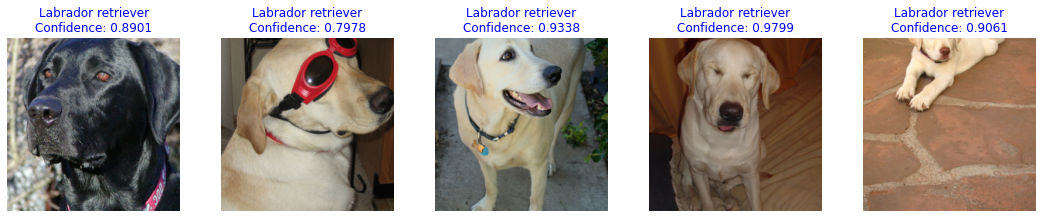

In [7]:
#@title Load Images
#@markdown Load labrador retriever images.
figsize = 3 #@param {type:"slider", min:0, max:10, step:1}


num_images = len(urls)

targets = torch.Tensor([208] * num_images).to(torch.int64)


images = load_images_from_urls(
    urls=urls,
    transform=transform,
)


plot_images(
    images=images,
    targets=targets,
    figsize=(num_images*figsize, figsize),
    use_cuda=use_cuda,
)

I-FGSM aid (ϵ=0.05): 100%|██████████| 100/100 [00:08<00:00, 11.32it/s]


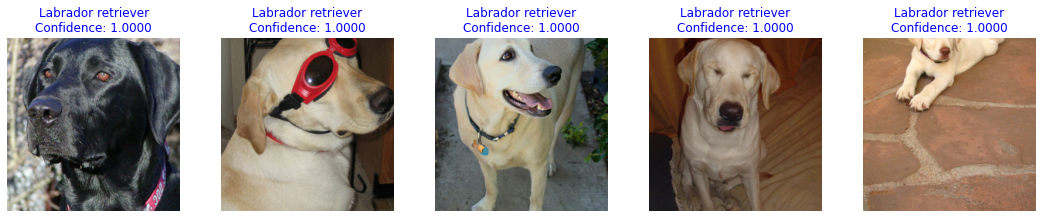

I-FGSM aid (ϵ=10): 100%|██████████| 100/100 [00:06<00:00, 15.03it/s]


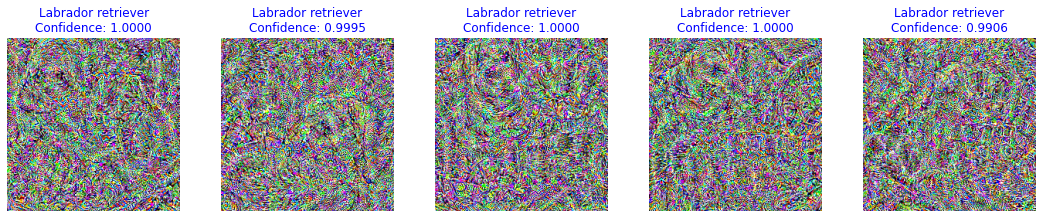

In [8]:
#@title Amicable Aid
#@markdown Perform amicable aid on loaded images.

eps_weak = 0.05#@param {type:"number"}
eps_strong = 10#@param {type:"number"}
iteration = 100#@param {type:"integer"}
clip_per_iter = True#@param {type:"boolean"}
figsize = 3 #@param {type:"slider", min:0, max:10, step:1}


# weak aid
weak_aid = IFGSM(
    model=model,
    epsilon=eps_weak,
    iteration=iteration,
    aid=True,
    normalizer=normalize,
    clip_per_iter=clip_per_iter,
    use_cuda=use_cuda,
)

weak_aid_images = weak_aid(
    data=images,
    targets=targets,
    verbose=True,
)

plot_images(
    images=weak_aid_images,
    targets=targets,
    figsize=(num_images*figsize, figsize),
    use_cuda=use_cuda,
)


# strong aid
strong_aid = IFGSM(
    model=model,
    epsilon=eps_strong,
    iteration=iteration,
    aid=True,
    normalizer=normalize,
    clip_per_iter=clip_per_iter,
    use_cuda=use_cuda,
)

strong_aid_images = strong_aid(
    data=images,
    targets=targets,
    verbose=True,
)

plot_images(
    images=strong_aid_images,
    targets=targets,
    figsize=(num_images*figsize, figsize),
    use_cuda=use_cuda,
)

Universal I-FGSM aid (ϵ=0.05): 100%|██████████| 100/100 [00:05<00:00, 17.10it/s]


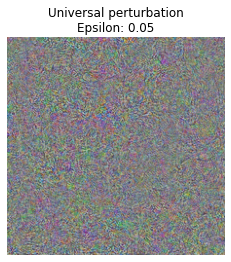

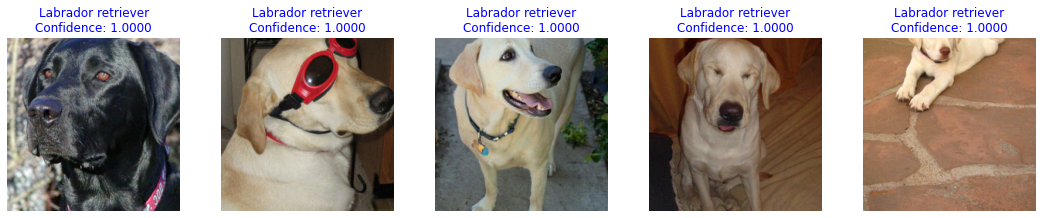

Universal I-FGSM aid (ϵ=10): 100%|██████████| 100/100 [00:05<00:00, 17.70it/s]


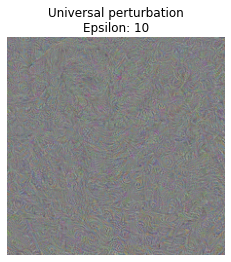

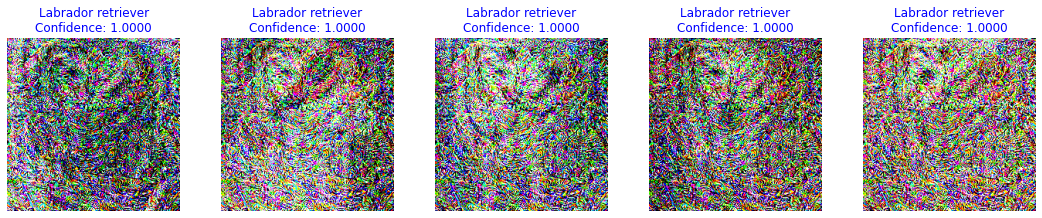

In [9]:
#@title Universal Amicable Aid
#@markdown Perform universal amicable aid on loaded images.

eps_weak = 0.05#@param {type:"number"}
eps_strong = 10#@param {type:"number"}
iteration = 100#@param {type:"integer"}
clip_per_iter = False#@param {type:"boolean"}
figsize = 3 #@param {type:"slider", min:0, max:10, step:1}


# weak universal aid
weak_aid = IFGSM(
    model=model,
    epsilon=eps_weak,
    iteration=iteration,
    aid=True,
    normalizer=normalize,
    clip_per_iter=clip_per_iter,
    use_cuda=use_cuda,
)

weak_universal_perturbation = weak_aid.generate_universal_perturbation(
    data=images,
    targets=targets,
    batch_size=None,
    verbose=True,
)

plt.title(f"Universal perturbation\nEpsilon: {eps_weak}")
plt.imshow(((
        weak_universal_perturbation / 2 / eps_weak + 
        torch.ones_like(weak_universal_perturbation) * 0.5
    )).permute(1, 2, 0)
)
plt.axis("off")
plt.show()

plot_images(
    images=images + weak_universal_perturbation,
    targets=targets,
    figsize=(num_images*figsize, figsize),
    use_cuda=use_cuda,
)


# strong universal aid
strong_aid = IFGSM(
    model=model,
    epsilon=eps_strong,
    iteration=iteration,
    aid=True,
    normalizer=normalize,
    clip_per_iter=clip_per_iter,
    use_cuda=use_cuda,
)

strong_universal_perturbation = strong_aid.generate_universal_perturbation(
    data=images,
    targets=targets,
    batch_size=None,
    verbose=True,
)

plt.title(f"Universal perturbation\nEpsilon: {eps_strong}")
plt.imshow(((
        strong_universal_perturbation / 2 / eps_strong + 
        torch.ones_like(strong_universal_perturbation) * 0.5
    )).permute(1, 2, 0)
)
plt.axis("off")
plt.show()

plot_images(
    images=images + strong_universal_perturbation,
    targets=targets,
    figsize=(num_images*figsize, figsize),
    use_cuda=use_cuda,
)